In [79]:
import pandas as pd
import numpy as np

In [80]:
df = pd.read_csv("DataAnalyst.csv")

In [81]:
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


In [82]:
df = df.replace(-1, np.nan)

In [83]:
df["Revenue"].unique()

array(['$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       'Unknown / Non-Applicable', '$50 to $100 million (USD)',
       '$1 to $2 billion (USD)', '$5 to $10 billion (USD)',
       '$1 to $5 million (USD)', '$25 to $50 million (USD)',
       '$10+ billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)', '-1',
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],
      dtype=object)

<AxesSubplot: ylabel='Revenue'>

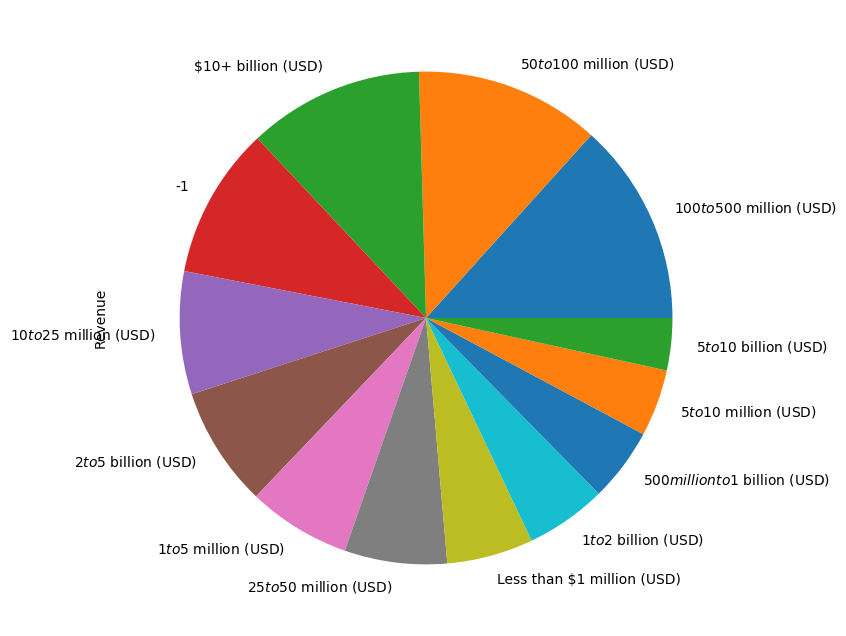

In [84]:
df["Revenue"].value_counts()[1::].plot.pie(figsize=(10, 8))

In [85]:
df["Salary Estimate"].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$47K-$81K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: Salary Estimate, Length: 90, dtype: int64

<AxesSubplot: ylabel='Salary Estimate'>

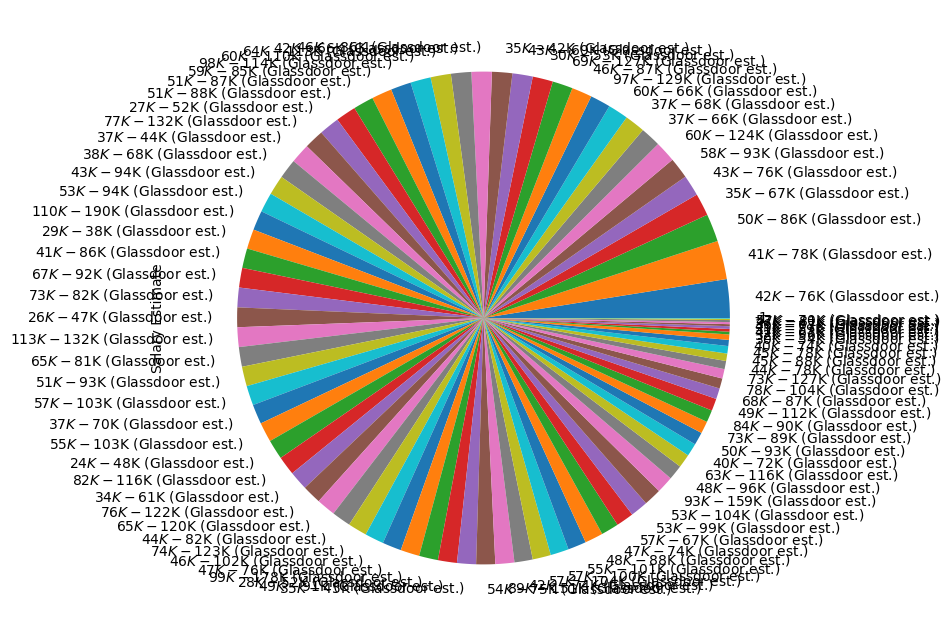

In [86]:
df["Salary Estimate"].value_counts().plot.pie(figsize=(10, 8))

In [87]:
df["Salary Estimate"].str.extract("(\d+)")

,0
0,37
1,37
2,37
3,37
4,37
...,...
2248,78
2249,78
2250,78
2251,78


In [88]:
df = df[df["Salary Estimate"].notnull()]

In [89]:
df["Bottom Salary Estimate($K)"] = df["Salary Estimate"].str.extract("(\d+)").astype(int)

In [90]:
df["Top Salary Estimate($K)"] = df["Salary Estimate"].str.extract("-\$(\d+)").astype(float)

In [91]:
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Bottom Salary Estimate($K),Top Salary Estimate($K)
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37,66.0
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37,66.0


In [92]:
df["Top Salary Estimate($K)"].describe()

count    2252.000000
mean       89.979130
std        29.315605
min        38.000000
25%        70.000000
50%        87.000000
75%       104.000000
max       190.000000
Name: Top Salary Estimate($K), dtype: float64

In [93]:
df["Bottom Salary Estimate($K)"].describe()

count    2253.000000
mean       54.243231
std        19.603176
min         1.000000
25%        41.000000
50%        50.000000
75%        64.000000
max       113.000000
Name: Bottom Salary Estimate($K), dtype: float64

In [94]:
df["Bottom Salary Estimate($K)"].max()

113

In [95]:
df["Top Salary Estimate($K)"].max()

190.0

<AxesSubplot: ylabel='Bottom Salary Estimate($K)'>

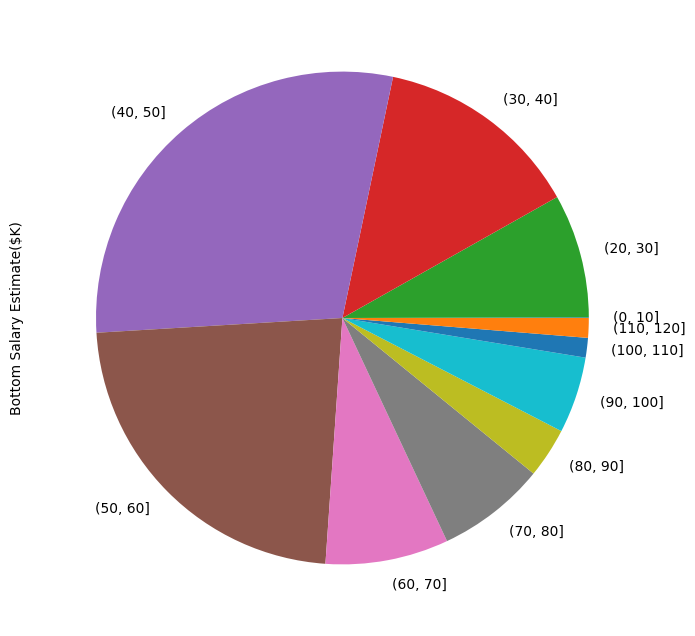

In [96]:
df["Bottom Salary Estimate($K)"].groupby(pd.cut(df["Bottom Salary Estimate($K)"], np.arange(0,
 df["Bottom Salary Estimate($K)"].max() + 10, 10))).count().plot.pie(figsize=(10, 8))

<AxesSubplot: ylabel='Top Salary Estimate($K)'>

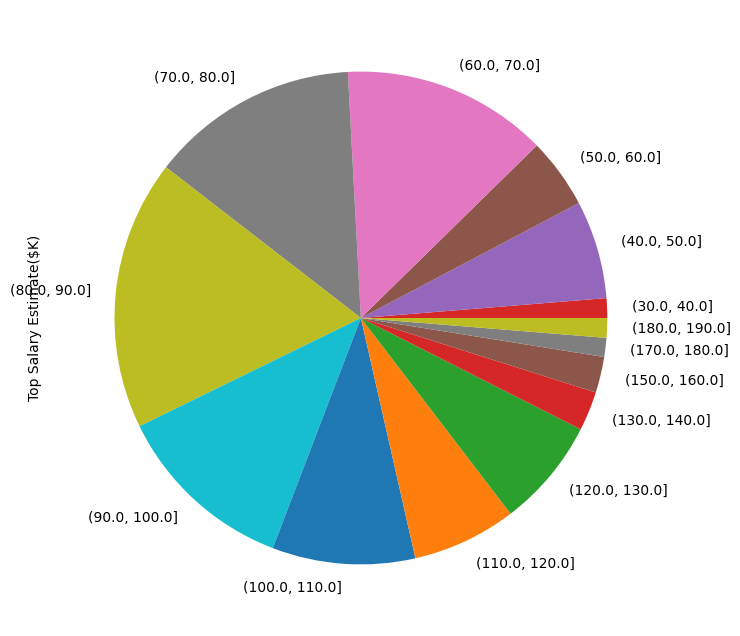

In [106]:
df["Top Salary Estimate($K)"].groupby(pd.cut(df["Top Salary Estimate($K)"], np.arange(0,
 df["Top Salary Estimate($K)"].max() + 10, 10))).count().plot.pie(figsize=(10, 8))

In [107]:
df["Mean Salary Estimate($K)"] = (df["Bottom Salary Estimate($K)"] + df["Top Salary Estimate($K)"]) / 2

<AxesSubplot: xlabel='Mean Salary Estimate($K)'>

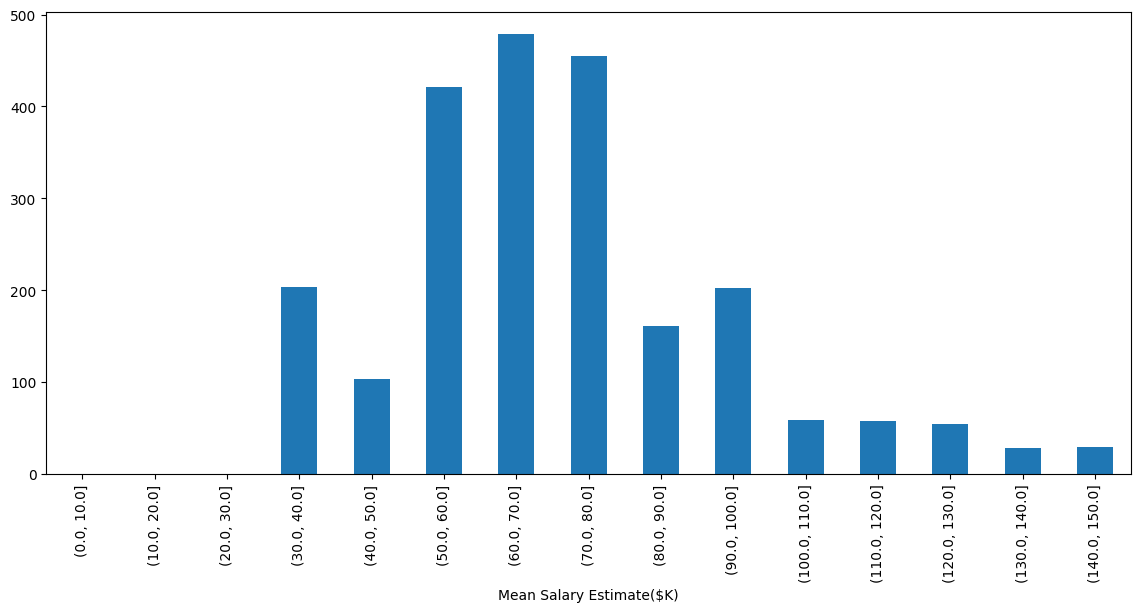

In [115]:
df["Mean Salary Estimate($K)"].groupby(pd.cut(df["Mean Salary Estimate($K)"], np.arange(0,
 df["Mean Salary Estimate($K)"].max() + 10, 10))).count().plot.bar(figsize=(14, 6))

In [114]:
df.corr(numeric_only=True)

,Unnamed: 0,Rating,Founded,Bottom Salary Estimate($K),Top Salary Estimate($K),Meaen Salary Estimate($K),Mean Salary Estimate($K)
Unnamed: 0,1.000000,0.063118,0.099510,0.058177,0.142627,0.113550,0.113550
Rating,0.063118,1.000000,0.176102,0.024246,0.051387,0.042560,0.042560
Founded,0.099510,0.176102,1.000000,0.081440,0.099208,0.095733,0.095733
Bottom Salary Estimate($K),0.058177,0.024246,0.081440,1.000000,0.858547,0.947941,0.947941
Top Salary Estimate($K),0.142627,0.051387,0.099208,0.858547,1.000000,0.977130,0.977130
Meaen Salary Estimate($K),0.113550,0.042560,0.095733,0.947941,0.977130,1.000000,1.000000
Mean Salary Estimate($K),0.113550,0.042560,0.095733,0.947941,0.977130,1.000000,1.000000
